# PCA
## wine Data
### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Check out the Data

In [2]:
df = pd.read_csv(r'C:\Users\PRANAV\Desktop\lms\PCA\wine.csv')

In [3]:
df.head()


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
from sklearn.preprocessing import scale

In [5]:
std_df = scale(df)
std_df

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [6]:
from sklearn.decomposition import PCA


In [7]:
pca = PCA(n_components=3)
pca_value = pca.fit_transform(df)

In [8]:
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([99.81, 99.98, 99.99])

Text(0, 0.5, 'Second Principal Component')

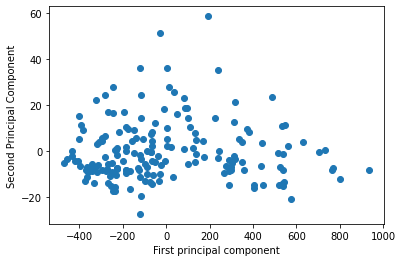

In [9]:
plt.scatter(pca_value[:,0],pca_value[:,1],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [10]:
pca_value

array([[ 3.18564055e+02,  2.14907729e+01,  3.16461306e+00],
       [ 3.03098514e+02, -5.36608268e+00,  6.81699246e+00],
       [ 4.38062063e+02, -6.53798613e+00, -1.06671672e+00],
       [ 7.33240711e+02,  1.93319951e-01, -9.38312300e-01],
       [-1.15699516e+01,  1.84872549e+01, -4.24917332e-01],
       [ 7.03231800e+02, -3.31723191e-01,  9.22964109e-01],
       [ 5.42972384e+02, -1.35191971e+01,  2.12077648e+00],
       [ 5.48402656e+02,  1.14491475e+01,  7.17177590e-02],
       [ 2.98037964e+02, -8.18149185e+00,  3.89306597e+00],
       [ 2.98050654e+02, -7.10283985e+00,  1.57388714e+00],
       [ 7.63080247e+02, -8.33356923e+00, -1.87870022e+00],
       [ 5.32944043e+02, -1.42878810e+01,  1.47596597e-01],
       [ 5.72835177e+02, -2.10050612e+01,  3.72388438e-01],
       [ 4.02926332e+02, -1.61035066e+01,  5.65119701e+00],
       [ 8.00053884e+02, -1.21175637e+01,  2.96916824e+00],
       [ 5.63246356e+02,  2.21467383e+00, -5.26577812e-01],
       [ 5.33380465e+02,  1.08044932e+01

In [11]:
df1= pd.DataFrame(pca_value,columns=['PCA1','PCA2','PCA3'])

In [12]:
df1.head()

,PCA1,PCA2,PCA3
0,318.564055,21.490773,3.164613
1,303.098514,-5.366083,6.816992
2,438.062063,-6.537986,-1.066717
3,733.240711,0.193320,-0.938312
4,-11.569952,18.487255,-0.424917


### Hierarchical Clustering


In [13]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

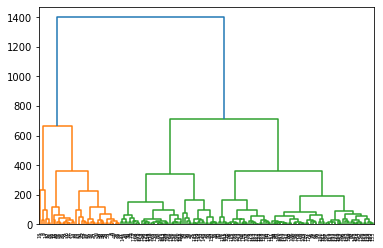

In [14]:
dendrogram = sch.dendrogram(sch.complete(df1))

In [15]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
y_hc = hc.fit_predict(df1)
clusters = pd.DataFrame(y_hc, columns=['Clusters'])

In [16]:
df2 = pd.concat([df1,clusters], axis = 1)
df2

,PCA1,PCA2,PCA3,Clusters
0,318.564055,21.490773,3.164613,0
1,303.098514,-5.366083,6.816992,0
2,438.062063,-6.537986,-1.066717,0
3,733.240711,0.193320,-0.938312,0
4,-11.569952,18.487255,-0.424917,2
...,...,...,...,...
173,-6.981858,-4.538116,-2.625187,2
174,3.129945,2.338236,-4.423240,2
175,88.456310,18.779644,-2.423127,2
176,93.454472,18.674180,-1.958775,2


In [18]:
df1.value_counts(df2.Clusters)

Clusters
1    72
2    58
0    48
dtype: int64

### K-Means Clustering

In [19]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [20]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

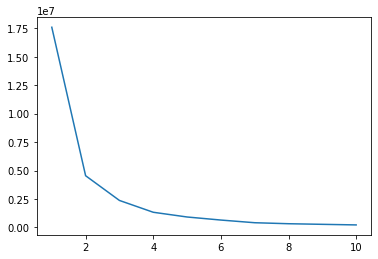

In [21]:
plt.plot(range(1,11),wcss)
plt.show()

In [22]:
model1 = KMeans(n_clusters=4).fit(df1)

In [23]:
km = pd.DataFrame(model1.labels_ ,columns=['Cluster2'] )
km

,Cluster2
0,3
1,3
2,1
3,1
4,0
...,...
173,0
174,0
175,0
176,0


In [25]:
df3 = pd.concat([df1,km], axis =1)
df3

,PCA1,PCA2,PCA3,Cluster2
0,318.564055,21.490773,3.164613,3
1,303.098514,-5.366083,6.816992,3
2,438.062063,-6.537986,-1.066717,1
3,733.240711,0.193320,-0.938312,1
4,-11.569952,18.487255,-0.424917,0
...,...,...,...,...
173,-6.981858,-4.538116,-2.625187,0
174,3.129945,2.338236,-4.423240,0
175,88.456310,18.779644,-2.423127,0
176,93.454472,18.674180,-1.958775,0


### Clustering on Original Data

In [27]:
df_orig = pd.read_csv(r'C:\Users\PRANAV\Desktop\lms\PCA\wine.csv')

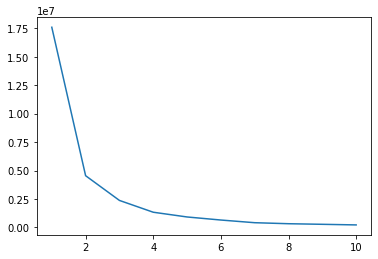

In [28]:
wss = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i)
    kmean.fit(df_orig)
    wss.append(kmean.inertia_)
plt.plot(range(1,11),wss)
plt.show()

In [29]:
model2 = KMeans(n_clusters=3).fit(df_orig)
ab = model2.labels_

In [31]:
rr = pd.DataFrame(ab, columns=['cluster3'])
df4 = pd.concat([df_orig, rr], axis = 1)
df4

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster3
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2
